# **DEPENDICIES TAKE A WHILE TO SETUP😊**

In [ ]:
!pip install transformers diffusers accelerate
!pip install xformers 

# **TEXT TO IMAGE⬇️**

In [6]:
from  diffusers import AutoPipelineForText2Image  
from IPython.display import FileLink
import matplotlib.pyplot as plt
import matplotlib.image as render
import torch
import random

model_id = "emilianJR/epiCRealism"    #model from hugginface    

pipe = AutoPipelineForText2Image.from_pretrained(

    model_id, 
    torch_dtype=torch.float16, 
    use_safetensors=True, 
    safety_checker = None, 
    requires_safety_checker = False)

pipe.enable_xformers_memory_efficient_attention()

pipe = pipe.to("cuda") 


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

# **ENTER PROMPTS HERE⌨️**

In [89]:
prompts = "cyper_punk, 18 year old  boy sitting in a cafe, best lightings, portrate,lookg at window, realistic, hd"
negative = "nsfw, bad_quality,worst_quality,bad_anatomy"

# **RUN MODELR🏃‍♂️** 

  0%|          | 0/50 [00:00<?, ?it/s]

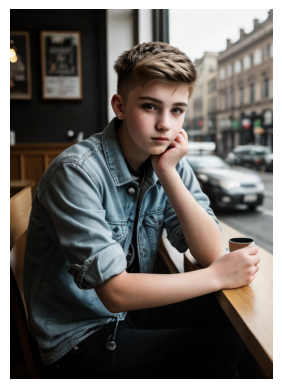

Download:



/kaggle/working/cyper_punk, 18 year old boy boy sitting in a cafe, best lightings, portrate,lookg at window, realistic, hd8291.png

In [90]:
image = pipe(

        prompt = prompts,
        negative_prompt = negative,
        guidance_scale=7,         
        num_inference_steps=50,   
        height=720,
        weight=512,             

            ).images[0]
imgName = f"{prompts}{random.randint(0,9999)}.png"
image = image.save(imgName)

#output image:
output = render.imread(imgName)
plt.imshow(output)
plt.axis('off')         
plt.show() 

#download image:
print("Download:\n") 
FileLink(imgName)
